In [1]:
#Import the standard python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5

In [2]:
#Check if we have started the terminal
if(mt5.initialize()):
    print("Failed To Startup")

else:
    print("Logged In")

Failed To Startup


In [116]:
if(mt5.symbol_select("EURUSD")):
    print("Found EURUSD Market")

else:
    print("Failed To Find EURUSD Market")

Found EURUSD Market


In [117]:
#Read in the market data 
data = pd.DataFrame(mt5.copy_rates_from_pos("EURUSD",mt5.TIMEFRAME_D1,0,4000))
data['time'] = pd.to_datetime(data['time'],unit='s')
data

time     open     high      low    close  tick_volume  spread  \
0    2010-06-07  1.19460  1.19907  1.18758  1.19166        63132       8   
1    2010-06-08  1.19165  1.20080  1.19022  1.19640        63108       9   
2    2010-06-09  1.19636  1.20724  1.19236  1.19840        55570       8   
3    2010-06-10  1.19834  1.21411  1.19565  1.21081        63926       8   
4    2010-06-11  1.21074  1.21521  1.20452  1.21112        70668      10   
...         ...      ...      ...      ...      ...          ...     ...   
3995 2025-10-21  1.16389  1.16553  1.15975  1.15988        48570       0   
3996 2025-10-22  1.15965  1.16224  1.15768  1.16089        43718       0   
3997 2025-10-23  1.16079  1.16201  1.15852  1.16175        35507       0   
3998 2025-10-24  1.16152  1.16489  1.16008  1.16253        44280       0   
3999 2025-10-27  1.16290  1.16478  1.16175  1.16269        14939       1   

      real_volume  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
3995            0  
3996            0  
3997            0  
3998            0  
3999            0  

[4000 rows x 8 columns]

In [118]:
#Focus on the major price levels
data = data.iloc[:,:5]
data

time     open     high      low    close
0    2010-06-07  1.19460  1.19907  1.18758  1.19166
1    2010-06-08  1.19165  1.20080  1.19022  1.19640
2    2010-06-09  1.19636  1.20724  1.19236  1.19840
3    2010-06-10  1.19834  1.21411  1.19565  1.21081
4    2010-06-11  1.21074  1.21521  1.20452  1.21112
...         ...      ...      ...      ...      ...
3995 2025-10-21  1.16389  1.16553  1.15975  1.15988
3996 2025-10-22  1.15965  1.16224  1.15768  1.16089
3997 2025-10-23  1.16079  1.16201  1.15852  1.16175
3998 2025-10-24  1.16152  1.16489  1.16008  1.16253
3999 2025-10-27  1.16290  1.16478  1.16175  1.16269

[4000 rows x 5 columns]

In [122]:
#Drop off the test period
data = data.iloc[:-(370*2),:]
data

time     open     high      low    close
0    2010-06-07  1.19460  1.19907  1.18758  1.19166
1    2010-06-08  1.19165  1.20080  1.19022  1.19640
2    2010-06-09  1.19636  1.20724  1.19236  1.19840
3    2010-06-10  1.19834  1.21411  1.19565  1.21081
4    2010-06-11  1.21074  1.21521  1.20452  1.21112
...         ...      ...      ...      ...      ...
3255 2022-12-16  1.06236  1.06631  1.05849  1.05891
3256 2022-12-19  1.05812  1.06580  1.05756  1.06064
3257 2022-12-20  1.06031  1.06587  1.05788  1.06218
3258 2022-12-21  1.06232  1.06451  1.05904  1.06040
3259 2022-12-22  1.06028  1.06595  1.05733  1.05971

[3260 rows x 5 columns]

In [123]:
#Define the new horizon
HORIZON = 10

In [124]:
#Label the data
data['Target 1'] = data['close'].shift(-HORIZON)
data['Target 2'] = data['high'].shift(-HORIZON)
data['Target 3'] = data['low'].shift(-HORIZON)

C:\Users\Westwood\AppData\Local\Temp\ipykernel_22536\2495361096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target 1'] = data['close'].shift(-HORIZON)
C:\Users\Westwood\AppData\Local\Temp\ipykernel_22536\2495361096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target 2'] = data['high'].shift(-HORIZON)
C:\Users\Westwood\AppData\Local\Temp\ipykernel_22536\2495361096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [125]:
#Drop missing rows
data.dropna(inplace=True)

C:\Users\Westwood\AppData\Local\Temp\ipykernel_22536\2680110006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [126]:
#Import cross validation tools
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import LinearSVR

In [ ]:
models = [LinearRegression(),
          Ridge(alpha=10e-3),
          RandomForestRegressor(random_state=0),
          GradientBoostingRegressor(random_state=0),
          KNeighborsRegressor(n_jobs=-1,n_neighbors=5),
          RadiusNeighborsRegressor(n_jobs=-1),
          LinearSVR(random_state=0),
          MLPRegressor(random_state=0,hidden_layer_sizes=(4,10,40,10),solver='lbfgs')]

In [128]:
#The big picture of what we want to test
train , test = data.iloc[:data.shape[0]//2,:] , data.iloc[data.shape[0]//2:,:]

In [129]:
#Define inputs and target
X = data.columns[1:-3]
y = data.columns[-3:]

In [130]:
X

Index(['open', 'high', 'low', 'close'], dtype='object')

In [131]:
#Fetch a new copy of the model
def get_model():
    return(LinearRegression())

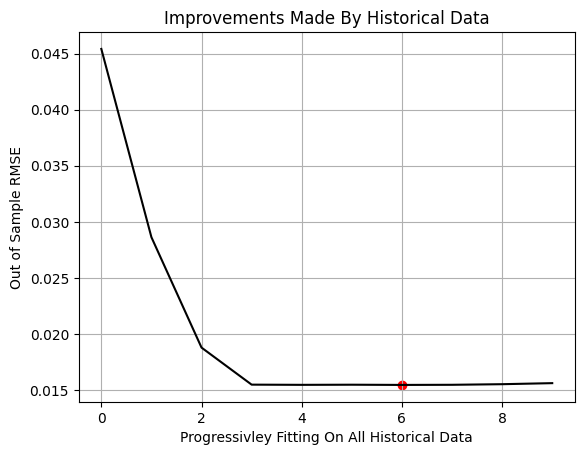

In [132]:
#Store our performance
error = []

#Define the total number of iterations we wish to perform
ITERATIONS = 10

#Let us perform the line search
for i in np.arange(ITERATIONS):
    #Training fraction 
    fraction =((i+1)/10)

    #Partition the data to select the most recent information
    partition_index = train.shape[0] - int(train.shape[0]*fraction)

    train_X_partition = train.loc[partition_index:,X]
    train_y_partition = train.loc[partition_index:,y[0]]

    #Fit a model 
    model = get_model()

    #Fit the model
    model.fit(train_X_partition,train_y_partition)

    #Cross validate the model out of sample
    score = root_mean_squared_error(test.loc[:,y[0]],model.predict(test.loc[:,X]))

    #Append the error levels
    error.append(score)

#Plot the results
plt.title('Improvements Made By Historical Data')
plt.plot(error,color='black')
plt.grid()
plt.ylabel('Out of Sample RMSE')
plt.xlabel('Progressivley Fitting On All Historical Data')
plt.scatter(np.argmin(error),np.min(error),color='red')

In [133]:
#Let us select the partition of interest
partition_index = train.shape[0] - int(train.shape[0]*(0.6))

In [134]:
train = train.loc[partition_index:,:]
train.reset_index(inplace=True,drop=True)
train

time     open     high      low    close  Target 1  Target 2  \
0   2012-12-03  1.29934  1.30751  1.29882  1.30587   1.31593   1.31863   
1   2012-12-04  1.30584  1.31073  1.30453  1.30935   1.32235   1.32376   
2   2012-12-05  1.30934  1.31253  1.30596  1.30701   1.31986   1.33076   
3   2012-12-06  1.30702  1.30857  1.29500  1.29571   1.32454   1.32942   
4   2012-12-07  1.29573  1.29718  1.28769  1.29261   1.31867   1.32464   
..         ...      ...      ...      ...      ...       ...       ...   
970 2016-08-30  1.11873  1.11920  1.11317  1.11418   1.12182   1.12601   
971 2016-08-31  1.11400  1.11650  1.11227  1.11571   1.12495   1.12737   
972 2016-09-01  1.11562  1.12048  1.11272  1.11957   1.12435   1.12833   
973 2016-09-02  1.11927  1.12518  1.11449  1.11449   1.11535   1.12497   
974 2016-09-05  1.11564  1.11819  1.11393  1.11458   1.11731   1.11975   

     Target 3  
0     1.31437  
1     1.31558  
2     1.31889  
3     1.31988  
4     1.31570  
..        ...  
970   1.12036  
971   1.12097  
972   1.12187  
973   1.11492  
974   1.11505  

[975 rows x 8 columns]

In [135]:
#Store each model's error levels
error = []

#Fit each model
for m in models:
    m.fit(train.loc[:,X],train.loc[:,y[0]])
    #Store our error levels
    error.append(root_mean_squared_error(test.loc[:,y[0]],m.predict(test.loc[:,X])))


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#models = [LinearRegression(),
# Ridge(alpha=10e-3),
# RandomForestRegressor(random_state=0),G
# GradientBoostingRegressor(random_state=0),
# KNeighborsRegressor(n_jobs=-1,n_neighbors=5),
# RadiusNeighborsRegressor(n_jobs=-1),
# LinearSVR(random_state=0),
# MLPRegressor(random_state=0,hidden_layer_sizes=(4,10,40,10),solver='lbfgs')]

([<matplotlib.axis.XTick at 0x2910a8e19d0>,
 [Text(0, 0, 'OLS'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'GBR'),
  Text(4, 0, 'KNR'),
  Text(5, 0, 'RNR'),
  Text(6, 0, 'LSVR'),
  Text(7, 0, 'DNN')])

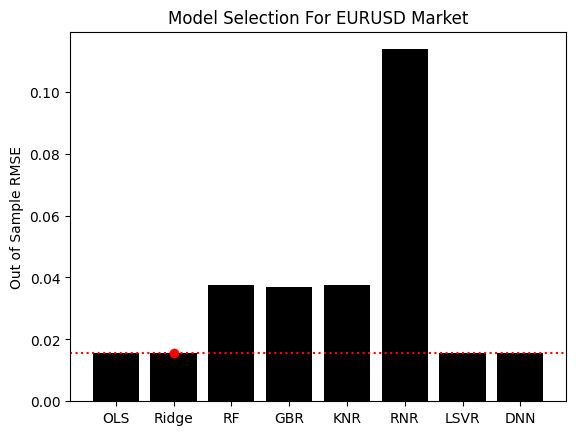

In [136]:
sns.barplot(error,color='black')
plt.axhline(np.min(error),color='red',linestyle=':')
plt.scatter(np.argmin(error),np.min(error),color='red')
plt.ylabel('Out of Sample RMSE')
plt.title('Model Selection For EURUSD Market')
plt.xticks([0,1,2,3,4,5,6,7],['OLS','Ridge','RF','GBR','KNR','RNR','LSVR','DNN'])

In [139]:
error_scaled = []

for e in error:
    error_scaled.append(e/np.min(error))


In [143]:
error_scaled

[1.0018294841828854,
 1.0,
 2.424635896156612,
 2.3977142998600995,
 2.438901859749838,
 7.359665160131018,
 1.007303383471162,
 1.0128383294180612]

In [146]:
from sklearn.model_selection import RandomizedSearchCV,TimeSeriesSplit

In [157]:
#Define the time series cross validation tool
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

#Define the parameter values we want to search over
dist = dict(
    loss=['squared_error','poisson'],
    activation = ['identity','relu','tanh','logistic'],
    solver=['adam','lbfgs','sgd'],
    learning_rate=['constant','invscaling','adaptive'],
    learning_rate_init=[1,0,10e-1,10e-2,10e-3],
    hidden_layer_sizes=[(4,10,4),(4,4,4,4),(4,1,8,2),(4,2,6,3),(4,2,1,4),(4,2,8,16,2)],
    alpha=[1,0,10e-1,10e-2,10e-3]
)

#Define basic model parameters we want to keep fixed
model = MLPRegressor(shuffle=False,random_state=0,early_stopping=False,max_iter=1000)

#Define the randomized search object
rscv = RandomizedSearchCV(model,cv=tscv,param_distributions=dist,random_state=0,n_iter=50)

#Perform the search
rscv.fit(train.loc[:,X],train.loc[:,y[0]])

#Retreive the best parameters we found
rscv.best_params_

c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_base.py:31: RuntimeWarning: overflow encountered in exp
  np.exp(X, out=X)
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_base.py:215: RuntimeWarning: invalid value encountered in add
  xlogy(y_true, y_true / y_pred) - y_true + y_pred, weights=sample_weight, axis=0
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:284: RuntimeWarning: invalid value encountered in divide
  -self.learning_rate * m / (np.sqrt(v) + self.epsilon)
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer:

{'solver': 'lbfgs',
 'loss': 'squared_error',
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (4, 2, 1, 4),
 'alpha': 0.01,
 'activation': 'identity'}

<Axes: >

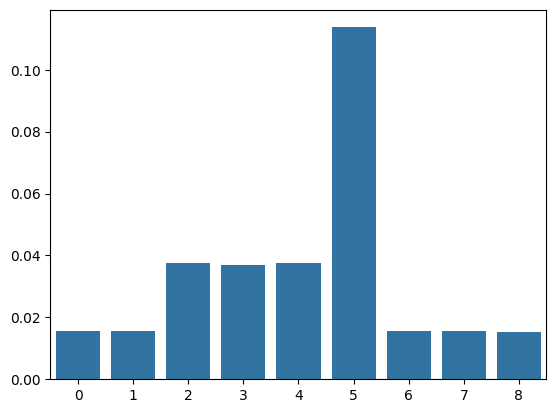

In [159]:
model = rscv.best_estimator_

error.append(root_mean_squared_error(test.loc[:,y[0]],model.predict(test.loc[:,X])))

sns.barplot(error)

Text(0.5, 1.0, 'Final Model Selection For EURUSD 2023-2025 Backtest')

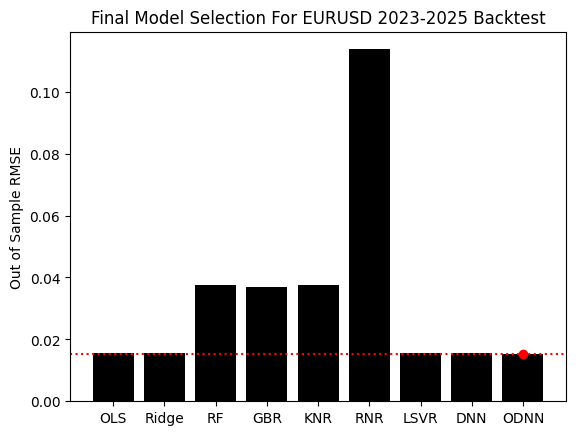

In [169]:
sns.barplot(error,color='black')
plt.scatter(x=np.argmin(error),y=np.min(error),color='red')
plt.axhline(np.min(error),color='red',linestyle=':')
plt.xticks([0,1,2,3,4,5,6,7,8],['OLS','Ridge','RF','GBR','KNR','RNR','LSVR','DNN','ODNN'])
plt.ylabel('Out of Sample RMSE')
plt.title('Final Model Selection For EURUSD 2023-2025 Backtest')

In [170]:
#Fit the baseline model
model = rscv.best_estimator_

In [171]:
#Prepare to export to ONNX
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [172]:
#Define ONNX model input and output dimensions
initial_types = [("FLOAT_INPUT",FloatTensorType([1,4]))]
final_types = [("FLOAT_OUTPUT",FloatTensorType([1,1]))]

In [173]:
#Convert the model to its ONNX prototype
onnx_proto = convert_sklearn(model,initial_types=initial_types,final_types=final_types,target_opset=12)

In [ ]:
#Save the ONNX model
onnx.save(onnx_proto,"EURUSD Improved Baseline LR.onnx")